## 1.3 Exploration of the data

# Tweet classification based on tweet text and hashtags

In [185]:
#General imports
from IPython.display import Markdown as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob

# 1. Introduction
## 1.1 Data to Pandas Dataframe
- used encoding type = utf_8_sig
- more info about encoding types in python :https://app.getpocket.com/read/2052346856

In [186]:
#Folders
data_folder = "data-merge"
data_file = "merged-data-tweets.csv"
data_csv =  glob.glob(os.path.join(data_folder, data_file))

In [187]:
#concat csv files into 1 pandas dataframe
encodingTypes_utf = ['utf_32','utf_32_be','utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8','utf_8_sig']
e_type = encodingTypes_utf[8]

#Print out used encoding type
print("Used encoding type: "+e_type)

#Make dataframe
tweets= pd.concat([pd.read_csv(f, delimiter=',',encoding=e_type) for f in data_csv], ignore_index=True)

Used encoding type: utf_8_sig


## 1.2 Description of data
- Tweets mined using a tweepy library in Python
- Different tags which are used for mining are 'huawei','microsoft','cnn','bbc','news','sony','google','apple'
- Each item in the dataset has a column 'mining_tag'. This column represents the tag which is used the mine this tweet
- The tweets are ordered on mining_tag in the dataframe. This is because the data was merged from multiple CSV files iterated by tag.
## 1.3 Exploration of the data

In [188]:
tweets.head(n=20)

Unnamed: 0            timestamp  \
0            0  2020-10-22 20:21:47   
1            1  2020-10-22 20:21:21   
2            2  2020-10-22 20:20:14   
3            3  2020-10-22 20:20:06   
4            4  2020-10-22 20:19:37   
5            5  2020-10-22 20:19:09   
6            6  2020-10-22 20:18:12   
7            7  2020-10-22 20:17:12   
8            8  2020-10-22 20:16:15   
9            9  2020-10-22 20:16:13   
10          10  2020-10-22 20:16:08   
11          11  2020-10-22 20:13:22   
12          12  2020-10-22 20:11:11   
13          13  2020-10-22 20:10:08   
14          14  2020-10-22 20:10:06   
15          15  2020-10-22 20:09:08   
16          16  2020-10-22 20:08:36   
17          17  2020-10-22 20:08:13   
18          18  2020-10-22 20:08:07   
19          19  2020-10-22 20:08:05   

                                           tweet_text            username  \
0   #Apple #wood #slices sanded wood slices 1.4 in...  b'TrueWildernesss'   
1   @supcase_atl is giving away an #iPhone12 and t...      b'kishirukrew'   
2   What a crazy record this is. I got it for the ...      b'ianmccarley'   
3   Trying #Chromatherapy with an #iOS #Apple #iPh...           b'idoser'   
4   $AAPL finds buyers at key support level: https...      b'tq_equities'   
5   @AppleSupport there is something wrong with ke...      b'oskarjursza'   
6   Apple should switch the iPhone to USB-C if it ...            b'Ladas'   
7   I made #appelmoes!!!  #appel #fruit #apple #fo...         b'FoodYcar'   
8   Sooo f*ing happy it finally came in!! My old M...     b'iiits_johnny'   
9   Fascinating read on how #Apple innovates via i...     b'jdnashattack'   
10  NEW Series 6 44mm #Apple Watches starting at $...       b'CoolDealCA'   
11  Important issues.  #FemTech #FinTech #AI #IoT ...  b'AI_Lisp_HPC0101'   
12  YOZORA (요조라) THE 5TH MINI ALBUM : 𝗛𝗔𝗪𝗪𝗔𝗛  CONC...          b'zoratwt'   
13  Pre-Order Now SELF SACRIFICE @AnyaBSummers #St...     b'AnyaBSummers'   
14  2020 13" 1.4GHz/512GB #Apple #MacBook Pro for ...   b'MacBookShopper'   
15  Touchscreen phone #tablet PC  #gadgets #boysto...  b'wildlife_ranger'   
16  YOZORA (요조라) THE 5TH MINI ALBUM : 𝗛𝗔𝗪𝗪𝗔𝗛  CONC...          b'zoratwt'   
17  Apple official ==&gt; #iPhone12 #Apple #AliExp...          b'I34Azer'   
18  @Apple really? Have you any plans about iPhone...  b'golibetamstinai'   
19  Browse &amp; make beautiful Apple Watch faces ...  b'applewatch_face'   

                                         all_hashtags  followers_count  \
0   ['Apple', 'wood', 'slices', 'handmade', 'craft...             1054   
1   ['iPhone12', 'apple', 'iphone12', 'giveaway', ...              166   
2                        ['apple', 'vinyl', 'things']              186   
3   ['Chromatherapy', 'iOS', 'Apple', 'iPhone', 'i...           169854   
4                                   ['AAPL', 'Apple']              884   
5                      ['apple', 'update', 'problem']              106   
6                                           ['apple']             4363   
7   ['appelmoes', 'appel', 'fruit', 'apple', 'food...               19   
8   ['MacBookPro', 'Apple', 'designerproblems', 'd...              202   
9                                           ['Apple']              195   
10     ['Apple', 'retail', 'coupon', 'Deal', 'ganga']             1835   
11  ['FemTech', 'FinTech', 'AI', 'IoT', 'research'...              279   
12  ['YOZORA', 'HAWWAH', 'APPLE', 'PARADISE_LOST',...              508   
13  ['SteamyRomance', 'ContemporaryRomance', 'Kind...            11158   
14                               ['Apple', 'MacBook']             1252   
15  ['tablet', 'gadgets', 'boystoys', 'gear', 'gee...             1482   
16  ['YOZORA', 'HAWWAH', 'APPLE', 'PARADISE_LOST',...              508   
17            ['iPhone12', 'Apple', 'AliExpress1111']               24   
18  ['Apple', 'AppleDay', 'future', 'iPhone12', 'i...               19   
19       ['applewatch', 'apple', 'applewatchseries4']              913   

   mining_t

In [189]:
shape = tweets.shape
md("The data consists of {} data-points and {} features".format(shape[0],shape[1]))

The data consists of 15712 data-points and 7 features

# 2. Cleaning dataset
## 2.1 Adding tags to tweet text

In [190]:
tweets['text_merge_tags'] = tweets['tweet_text'] +  tweets['all_hashtags'] 

for i in [0,5]:
    print(tweets['text_merge_tags'][i]),

#Apple #wood #slices sanded wood slices 1.4 inch #handmade #craft #supply #woodworking https://t.co/5Ae9WEtUQs via @Etsy['Apple', 'wood', 'slices', 'handmade', 'craft', 'supply', 'woodworking']
@AppleSupport there is something wrong with keyboard after update iPasOS 14.1 (18A8395) on my iPad mod.  MR7K2TY/A   see where it is on this screenshot.  in all apps i have this problem. #apple #update #problem https://t.co/mUT1nFp6l2['apple', 'update', 'problem']


## 2.2 Cleaning up the tweet texts
- preprocessor: https://pypi.org/project/tweet-preprocessor/
- string: https://docs.python.org/3/library/string.html
- re: https://docs.python.org/3/library/re.html

In [191]:
import string
import re as regex
import preprocessor as prep
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [192]:
def  clean_text(text_to_filter):
    # remove the URL
    text_urls = regex.sub(r"http\S+|www\S+|https\S+<|www\S+", '', text_to_filter, flags=regex.MULTILINE)

    # remove '@user' reference and '#' from text
    text_ref = regex.sub(r'\@\w+|\#','', text_urls)

    #Make lower case
    text_lower = text_ref.lower()

    #Remove Punctuation
    text_punct = text_lower.translate(str.maketrans('','',string.punctuation))

    # use tweet-preprocessor
    text_prep = prep.clean(text_punct)

    # remove digits
    text_digit = regex.sub(r'\d+','', text_prep)
    
    return   text_digit

In [193]:
tweets['text_merge_tags'] = tweets['text_merge_tags'] .apply(clean_text)
tweets['mining_tag'] = tweets['mining_tag'] .apply(clean_text)
tweets.head()

Unnamed: 0            timestamp  \
0           0  2020-10-22 20:21:47   
1           1  2020-10-22 20:21:21   
2           2  2020-10-22 20:20:14   
3           3  2020-10-22 20:20:06   
4           4  2020-10-22 20:19:37   

                                          tweet_text            username  \
0  #Apple #wood #slices sanded wood slices 1.4 in...  b'TrueWildernesss'   
1  @supcase_atl is giving away an #iPhone12 and t...      b'kishirukrew'   
2  What a crazy record this is. I got it for the ...      b'ianmccarley'   
3  Trying #Chromatherapy with an #iOS #Apple #iPh...           b'idoser'   
4  $AAPL finds buyers at key support level: https...      b'tq_equities'   

                                        all_hashtags  followers_count  \
0  ['Apple', 'wood', 'slices', 'handmade', 'craft...             1054   
1  ['iPhone12', 'apple', 'iphone12', 'giveaway', ...              166   
2                       ['apple', 'vinyl', 'things']              186   
3  ['Chromatherapy', 'iOS', 'Apple', 'iPhone', 'i...           169854   
4                                  ['AAPL', 'Apple']              884   

  mining_tag                                    text_merge_tags  
0      apple  apple wood slices sanded wood slices inch hand...  
1      apple  is giving away an iphone and this could be the...  
2      apple  what a crazy record this is i got it for the l...  
3      apple  trying chromatherapy with an ios apple iphone ...  
4      apple  aapl finds buyers at key support level sentime...

## 2.3 Drop unnecessary columns

In [194]:
# Remove column containing row numnber
tweets.drop(['all_hashtags','tweet_text','Unnamed: 0', 'timestamp','username','followers_count'], axis=1, inplace= True )
tweets = tweets.rename(columns={'mining_tag': 'label', 'text_merge_tags': 'text'})
tweets.head()

label                                               text
0  apple  apple wood slices sanded wood slices inch hand...
1  apple  is giving away an iphone and this could be the...
2  apple  what a crazy record this is i got it for the l...
3  apple  trying chromatherapy with an ios apple iphone ...
4  apple  aapl finds buyers at key support level sentime...

## 2.4 Remove label tags from text

In [195]:
# Check for several tags if they are removed from the text
def printTweetRows(df):
    for i in [2000,4000,6000,8000,10000,12000,14000]:
        print("["+ df['label'][i]+"] " + df['text'][i])
printTweetRows(tweets)

[apple] siri is my friend blog contact me about the blog siriismyfriendcom siri apple homekit ipad mac iphone ios macos alexa tesla homepodsiri apple homekit ipad mac iphone ios macos alexa tesla homepod
[cnn] cnn is such a disgracecnn disgrace
[google] click here the link socialmedia instagram facebook socialmediamarketing socialmedia instagram facebook socialmediamarketing fiverr twitter like linkedin onlinemarketing digitalmarketing business management google marketing branding instagram facebook socialmediamarketing socialmedia instagram facebook socialmediamarketing fiverr twitter like linkedin onlinemarketing digitalmarketing business management google marketing branding
[huawei] huawei ya price in karachi lahore islamabad pakistan detail specifications amp huawei ya price in pakistan at gharanapk mobiles store see full details here latestmobile ya huaweiya huaweiconnect lahore islamabad huawei pakistan gharanapk latestmobile ya huaweiya huaweiconnect
[microsoft] join rick weyenb

In [196]:
#Function to Remove words from a text
def removeWords(text, tag):
    text = text.replace(tag,"")
    return text

In [197]:
# Remove labels from text
for i, row in tweets.iterrows():
    tweets['text'][i] = removeWords(tweets['text'][i],tweets['label'][i])
printTweetRows(tweets)

[apple] siri is my friend blog contact me about the blog siriismyfriendcom siri  homekit ipad mac iphone ios macos alexa tesla homepodsiri  homekit ipad mac iphone ios macos alexa tesla homepod
[cnn]  is such a disgrace disgrace
[google] click here the link socialmedia instagram facebook socialmediamarketing socialmedia instagram facebook socialmediamarketing fiverr twitter like linkedin onlinemarketing digitalmarketing business management  marketing branding instagram facebook socialmediamarketing socialmedia instagram facebook socialmediamarketing fiverr twitter like linkedin onlinemarketing digitalmarketing business management  marketing branding
[huawei]  ya price in karachi lahore islamabad pakistan detail specifications amp  ya price in pakistan at gharanapk mobiles store see full details here latestmobile ya ya connect lahore islamabad  pakistan gharanapk latestmobile ya ya connect
[microsoft] join rick weyenberg and mark gendein as we talk about and how not all cloud solutions 

# 3 Investigation of the data
- wordcloud: https://github.com/amueller/word_cloud
- Counter: https://pypi.org/project/Counter/
## 3.1 Counting frequent used words

In [198]:
from collections import Counter
freq_used_words = Counter(" ".join(tweets["text"]).split()).most_common(20)

data_freq_used_words = pd.DataFrame(freq_used_words, columns = ['word' , 'count'])
data_freq_used_words.T.head(n=10)


0     1     2     3     4     5     6     7     8     9    10    11  \
word    the    to   and     a   for    in    of    on    is    ps   you  this   
count  8990  6719  5189  4180  4094  4023  3789  3519  3136  2611  2278  2153   

         12           13      14    15    16    17    18    19  
word   with  playstation  iphone     i    it   new  your   are  
count  2128         2047    1778  1672  1593  1385  1338  1325

## 3.2 Visulazing frequent used words

Label: huawei


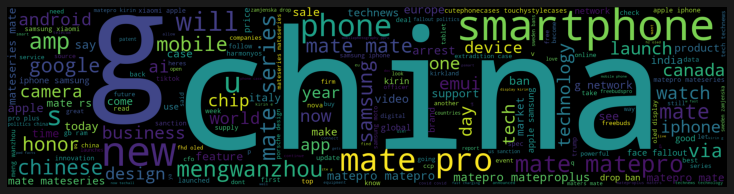

Label: microsoft


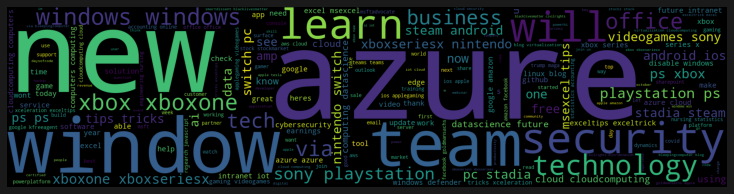

Label: cnn


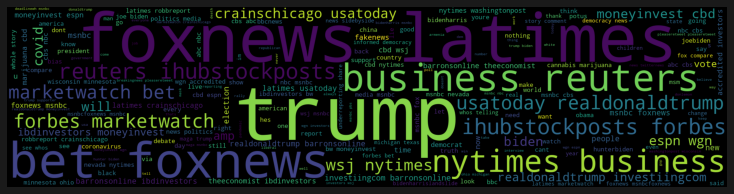

Label: bbc


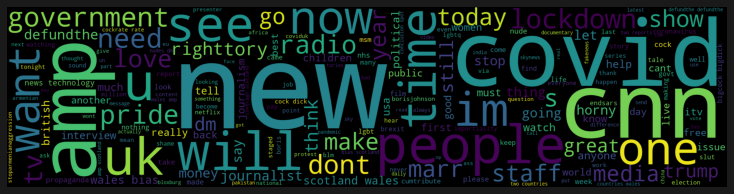

Label: news


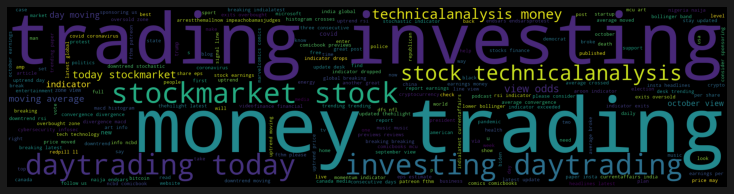

Label: sony


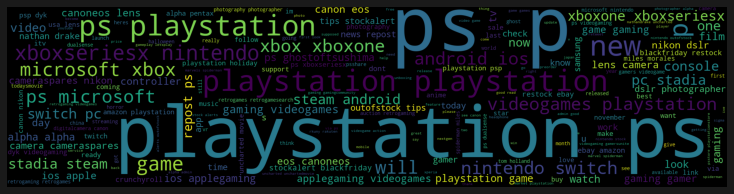

Label: google


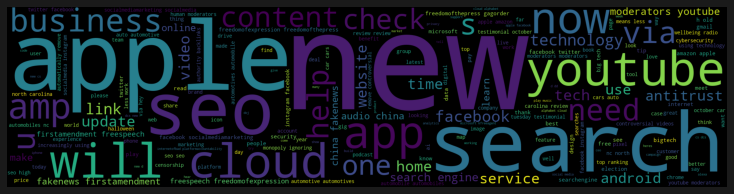

Label: apple


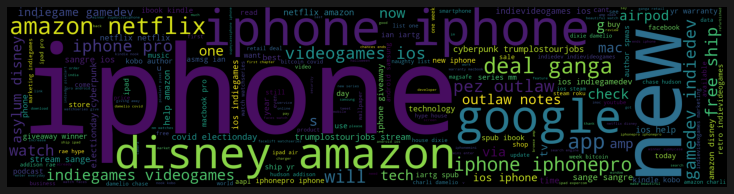

In [199]:
from wordcloud import WordCloud
tags =['huawei','microsoft','cnn','bbc','news','sony','google','apple']

for tag in tags:
    tag_words = ' '.join(list(tweets[tweets['label'] == tag]['text']))
    tag_word_cloud = WordCloud(width = 2000,height = 500).generate(tag_words)

    plt.figure(figsize = (10, 8), facecolor = 'k')
    print("Label: "+tag)
    plt.imshow(tag_word_cloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.savefig(os.path.join('wordclouds', tag+'_word_cloud.png'))
    plt.show()

# 4. Splitting data into training and testing set

In [200]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def split_data(data_test_size):
    X_raw = tweets['text'].values
    y_raw = tweets['label'].values
    
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw,y_raw,random_state = 42, test_size=data_test_size)

    tfidf = TfidfVectorizer()
    X_train_tfidf = tfidf.fit_transform(X_train_raw)
    X_test_tfidf = tfidf.transform(X_test_raw)

    return X_train_tfidf, X_test_tfidf, y_train, y_test

In [201]:
size_of_test_data = 0.20
X_train, X_test, y_train, y_test = split_data(size_of_test_data)

md("The test data consists of {}% of the whole dataset, leaving {}% for training".format(size_of_test_data*100, (1-size_of_test_data)*100))

The test data consists of 20.0% of the whole dataset, leaving 80.0% for training

# 5. Text Classification with Scikit-learn
## 5.1 General Code
### 5.1.1 Evaluation code

In [202]:
from sklearn.metrics import confusion_matrix
def conf_mat(y_test,predicted,model_name):
    mat = confusion_matrix(y_test, predicted)
    plt.figure(figsize=(4, 4))
    sns.set()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.savefig(os.path.join('outputs', model_name+'_confusion_matrix.png'))
    plt.show()


In [203]:
from sklearn.metrics import classification_report
def class_report(y_test,predicted):
    report  = classification_report(y_test, predicted,target_names=np.unique(y_test))
    return report

In [204]:
from yellowbrick.classifier import ClassificationReport
def class_report_graphical(model,model_name):
    plt.figure(figsize=(4, 4))
    visualizer = ClassificationReport(model, classes=tags, support=True)

    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    plt.savefig(os.path.join('outputs', model_name+'_classification_report.png'))
    plt.show()


### 5.1.2 Model code

In [205]:
import math
def do_model(model,model_name):
    #Fitting model
    fit = model.fit(X_train, y_train)
    #Scoring of train data
    train_score = model.score(X_train, y_train)
    #Scoring of test data
    test_score = model.score(X_test, y_test)
    #Prediction
    predicted = model.predict(X_test)

    #Confusion matrix
    conf_mat(y_test,predicted,model_name)
    #Classification report GRAPHICAL
    class_report_graphical(model,model_name)
    #Classification report TXT
    report_txt = class_report(y_test,predicted)
    #print(report_txt)

    #Scores
    print("train_score: ",train_score)
    print("test_score: ",test_score)

## 5.1 Multinomial Naive Bayes


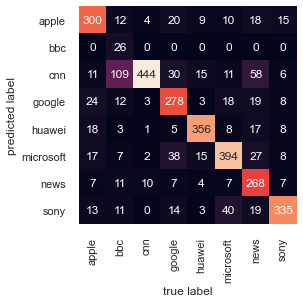

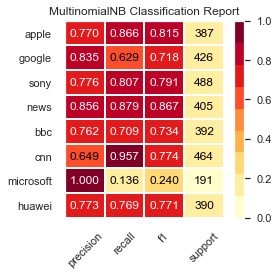

<Figure size 576x396 with 0 Axes>

train_score:  0.8716683904845254
test_score:  0.7639198218262806


In [206]:
from sklearn.naive_bayes import MultinomialNB
do_model(MultinomialNB(),'MultinomialNB')

## 5.2 SVM that uses SGD

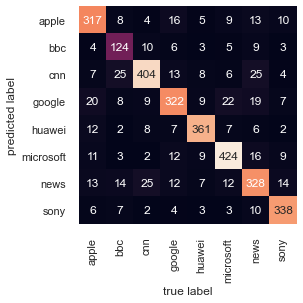

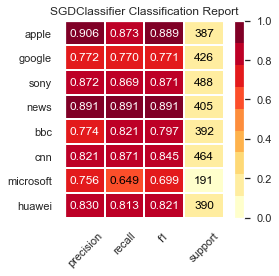

<Figure size 576x396 with 0 Axes>

train_score:  0.977722969209961
test_score:  0.8329621380846325


In [207]:
from sklearn.linear_model import SGDClassifier
do_model(SGDClassifier(),'SGDClassifier')

## 5.3 Random forest

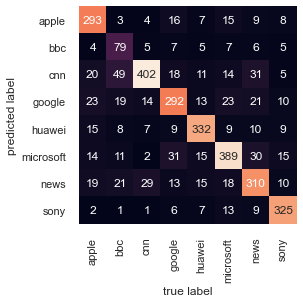

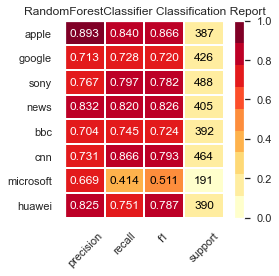

<Figure size 576x396 with 0 Axes>

train_score:  0.9999204391757499
test_score:  0.7706013363028953


In [208]:
from sklearn.ensemble import RandomForestClassifier
do_model(RandomForestClassifier(),'RandomForestClassifier')

## 5.4 Logistic Regression

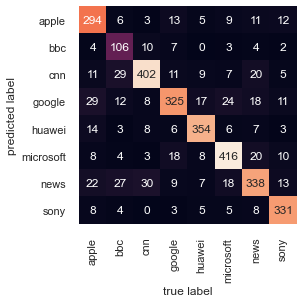

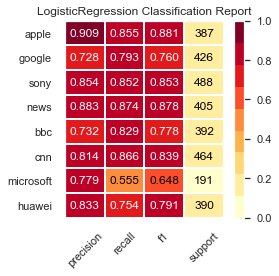

<Figure size 576x396 with 0 Axes>

train_score:  0.9450234704431538
test_score:  0.8164174355711104


In [209]:
from sklearn.linear_model import LogisticRegression
do_model(LogisticRegression(),'LogisticRegression')
#scatter plot ?

## 5.5 KNeighbors

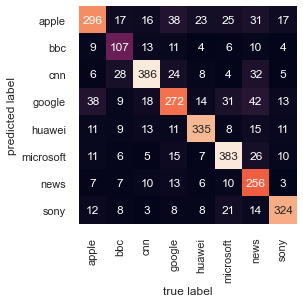

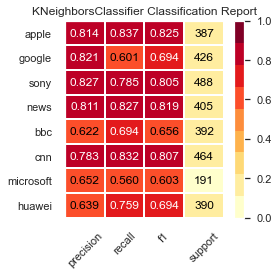

<Figure size 576x396 with 0 Axes>

train_score:  0.8330018298989578
test_score:  0.7505567928730512


In [210]:
from sklearn.neighbors import KNeighborsClassifier
do_model(KNeighborsClassifier(),'KNeighborsClassifier')